In [7]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('dropped_nulls_sorted.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,98484,Jzef Rajnisz,M,28.0,166.0,67.0,Poland,POL,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Parallel Bars,DNM
1,24720,Manoel Pereira da Silva,M,41.0,165.0,71.0,Portugal,POR,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Small-Bore Rifle, Three Positio...",DNM
2,7915,Bernd Barleben,M,20.0,183.0,79.0,Germany,GER,1960 Summer,1960,Summer,Roma,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Silver
3,7916,Harald Barlie,M,23.0,178.0,83.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",DNM
4,7917,Oddvar Barlie,M,31.0,176.0,79.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",DNM


In [10]:
avg_weight = df.groupby('Sport')['Weight'].mean()
print(avg_weight)
reset_df = avg_weight.reset_index()

Sport
Alpine Skiing                72.252720
Archery                      70.014870
Athletics                    68.950733
Badminton                    68.171439
Baseball                     85.718085
Basketball                   85.906125
Beach Volleyball             79.089219
Biathlon                     66.631419
Bobsleigh                    89.342215
Boxing                       65.201368
Canoeing                     76.533321
Cross Country Skiing         65.837698
Curling                      72.131707
Cycling                      70.076933
Diving                       60.609687
Equestrianism                67.761351
Fencing                      71.177920
Figure Skating               59.594595
Football                     70.365755
Freestyle Skiing             67.026835
Golf                         71.194444
Gymnastics                   56.611218
Handball                     81.508291
Hockey                       69.065144
Ice Hockey                   81.067669
Judo               

In [12]:
avg_height = df.groupby('Sport')['Height'].mean()
print(avg_height)

Sport
Alpine Skiing                173.595551
Archery                      173.249602
Athletics                    176.118935
Badminton                    174.220264
Baseball                     182.599291
Basketball                   191.396680
Beach Volleyball             186.202602
Biathlon                     174.052004
Bobsleigh                    181.674699
Boxing                       172.864419
Canoeing                     178.601252
Cross Country Skiing         173.313011
Curling                      174.168293
Cycling                      176.213938
Diving                       166.738083
Equestrianism                174.397327
Fencing                      177.311648
Figure Skating               168.228378
Football                     175.488228
Freestyle Skiing             170.940854
Golf                         174.046296
Gymnastics                   162.733368
Handball                     183.485077
Hockey                       173.313702
Ice Hockey                   179.0

In [36]:
import pandas as pd
#Create a dictionary with your data:
data = {
    'Sport': ['Alpine Skiing','Archery', 'Athletics', 'Badminton', 'Baseball', 'Basketball', 'BeachVolleyball',
              'Biathlon', 'Bobsleigh', 'Boxing', 'Canoeing', 'Cross Country Skiing', 'Curling', 'Cycling',
              'Diving', 'Equestrianism', 'Fencing', 'Figure Skating', 'Football', 'Freestyle Skiing', 'Golf',
              'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey', 'Judo', 'Luge', 'Modern Pentathlon', 'Nordic Combined',
              'Rhythmic Gymnastics', 'Rowing', 'Rugby Sevens', 'Sailing', 'Shooting', 'Short Track Speed Skating', 
              'Skeleton', 'Ski Jumping', 'Snowboarding', 'Softball', 'Speed Skating', 'Swimming', 'Synchronized Swimming', 
              'Table Tennis', 'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon', 'Volleyball', 'Water Polo', 'Weightlifting', 
              'Wrestling'],                    
    'Weight': [72.252720, 70.014870, 68.950733, 68.171439, 85.718085, 85.906125, 79.089219, 66.631419, 89.342215, 
               65.201368, 76.533321, 65.837698, 72.131707, 70.076933, 60.609687, 67.761351, 71.177920, 59.594595,
               70.365755, 67.026835, 71.194444, 56.611218, 81.508291, 69.065144, 81.067669, 78.820113, 77.282498,
               70.275891, 66.849758, 48.760976, 80.237427, 79.006734, 75.886692, 73.946871, 64.310484, 74.086705,
               65.038701, 69.527056, 67.471655, 70.076057, 70.566508, 55.856302, 64.915036, 68.088087, 70.803114,
               59.322148, 61.817490, 78.900214, 84.564064, 79.592567, 75.608021],
    'Height': [173.595551, 173.249602, 176.118935, 174.220264, 182.599291, 191.396680, 186.202602, 174.052004, 181.674699, 
              172.864419, 178.601252, 173.313011, 174.168293, 176.213938, 166.738083, 174.397327, 177.311648, 168.228378,
              175.488228, 170.940854, 174.046296, 162.733368, 183.485077, 173.313702, 179.028252, 174.164884, 176.655047,
              178.144988, 176.655072, 167.795122, 184.354976, 175.363636, 178.313563, 173.495448, 170.108199, 176.098266,
              176.618701, 173.043290, 169.428571, 174.170228, 178.649184, 168.489988, 171.253773, 176.750000, 178.940231,
              166.563758, 173.640684, 186.978944, 185.087187, 167.719495, 172.414148]
}
#Create a DataFrame from the dictionary:
df = pd.DataFrame(data)
df.tail()

,Sport,Weight,Height
46,Triathlon,61.817490,173.640684
47,Volleyball,78.900214,186.978944
48,Water Polo,84.564064,185.087187
49,Weightlifting,79.592567,167.719495
50,Wrestling,75.608021,172.414148


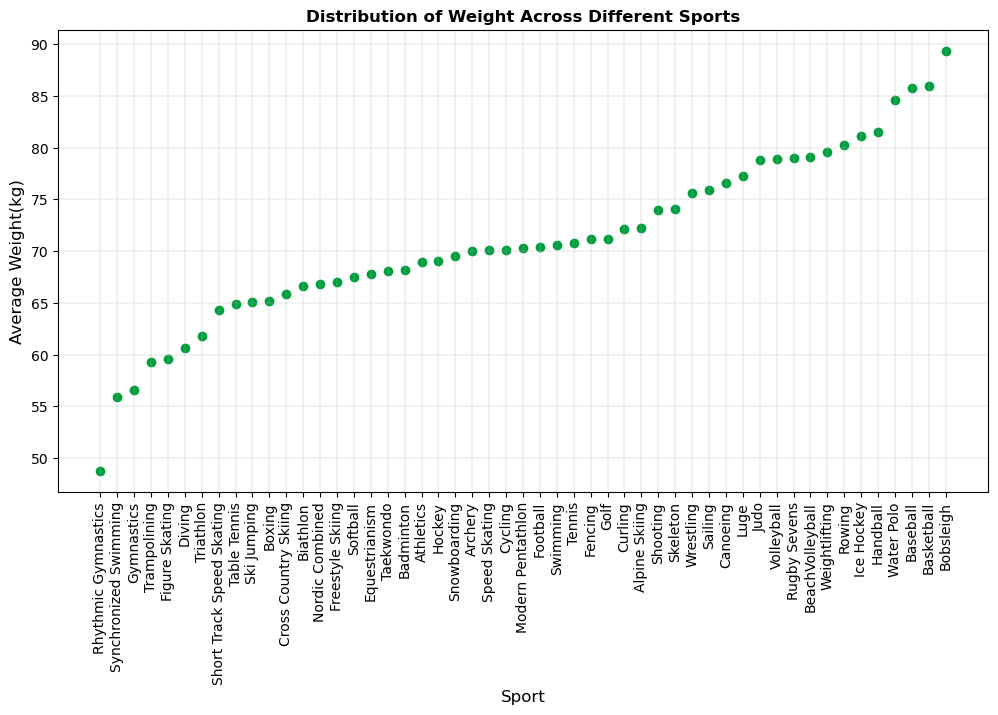

In [57]:
df = df.sort_values('Weight', ascending=True)

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Sport'], df['Weight'], color='#009F3D')
plt.xlabel('Sport', fontsize=12,)
plt.ylabel('Average Weight(kg)', fontsize=12,)
plt.xticks(rotation='vertical', fontsize=10)
plt.title('Distribution of Weight Across Different Sports', weight='bold' )
plt.grid(True, linestyle='-', linewidth=0.25)
plt.savefig('Weight_plot.png')
plt.show()

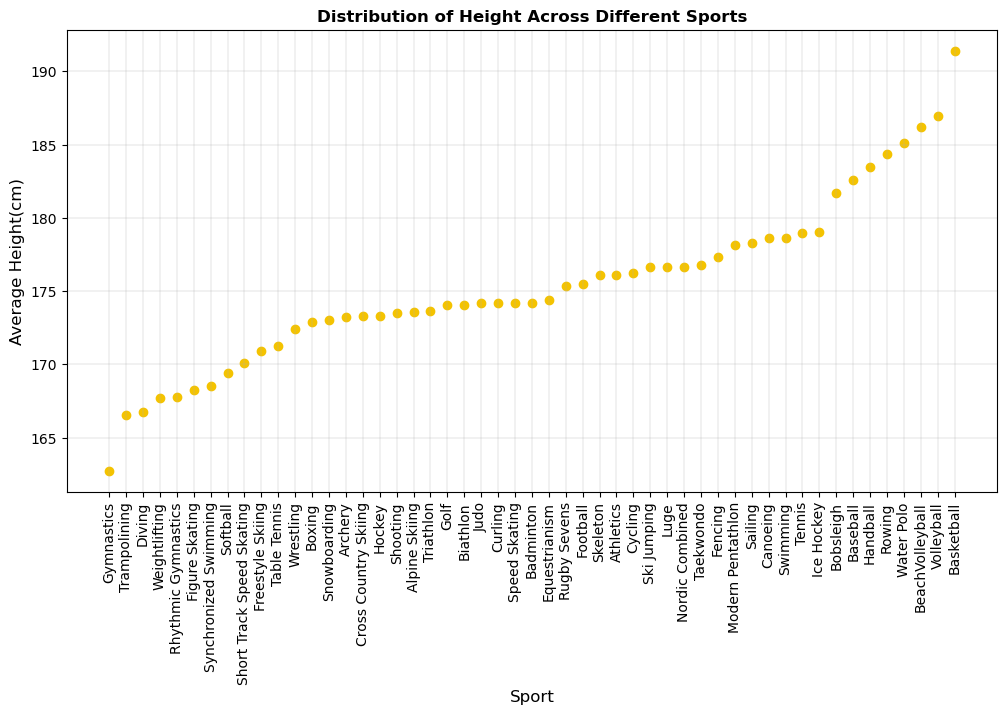

In [58]:
df = df.sort_values('Height', ascending=True)

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Sport'], df['Height'], color='#F4C300')
plt.xlabel('Sport', fontsize=12,)
plt.ylabel('Average Height(cm)', fontsize=12,)
plt.xticks(rotation='vertical', fontsize=10)
plt.title('Distribution of Height Across Different Sports', weight='bold' )
plt.grid(True, linestyle='-', linewidth=0.25)
plt.savefig('Height_plot.png')
plt.show()